In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
 

In [2]:

df = pd.read_csv('UNSW_NB15_training-setbroadclass.csv')

In [3]:
df = df.sample(n=80000, replace=True)

In [4]:
df.to_csv("D://faranResearch/M6/M6-SampleDS.csv")

In [4]:
df.shape

(80000, 45)

In [5]:
dfCount=df.attack_cat.value_counts()
dfCount

Normal         35816
Penetration    30753
Scanning        9367
Seizure         4064
Name: attack_cat, dtype: int64

In [135]:
dfCount.to_csv("D://faranResearch/M6/M6-dfCount.csv")

In [6]:
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')
df['attack_cat'] = df['attack_cat'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [136]:
df.to_csv("D://faranResearch/M6/M6-CatColConvert.csv")

In [7]:
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [8]:
X = df.iloc[:, :-2]
Y=df['attack_cat']

In [9]:
X

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
30783,30784,0.118234,111,0,3,72,72,4238,63774,1209.465963,...,3,1,1,1,0,0,0,4,10,0
44775,44776,1.316338,111,5,3,10,8,1032,354,12.914617,...,1,2,1,1,0,0,0,2,1,0
20032,20033,0.000009,117,2,4,2,0,114,0,111111.107200,...,43,43,25,52,0,0,0,43,52,0
43310,43311,0.791017,111,0,3,32,16,29852,850,59.417181,...,2,2,1,5,0,0,0,2,5,0
76298,76299,0.000000,6,0,4,1,0,46,0,0.000000,...,1,1,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54982,54983,0.000011,117,2,4,2,0,114,0,90909.090200,...,3,3,3,3,0,0,0,3,7,0
28748,28749,0.018724,111,0,3,16,18,1540,1644,1762.443915,...,8,6,1,6,0,0,0,8,10,0
43428,43429,0.000000,6,0,4,1,0,46,0,0.000000,...,1,1,1,1,0,0,0,1,1,1
21246,21247,0.000003,117,2,4,2,0,114,0,333333.321500,...,43,43,18,52,0,0,0,43,52,0


In [131]:
dfETC=pd.DataFrame(X_new)
dfETC.to_csv("D://faranResearch/M6/M6-DFETC.csv")

In [10]:
Y

30783    0
44775    1
20032    1
43310    0
76298    0
        ..
54982    1
28748    0
43428    0
21246    1
58286    1
Name: attack_cat, Length: 80000, dtype: int8

In [11]:
#Extra Tree classifier code for Minimu Feature
from sklearn.ensemble import ExtraTreesClassifier
# Create an Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Fit the model to your data
extra_trees.fit(X, Y)

# Print feature importances
feature_importances = extra_trees.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
id: 0.22606805662921994
dur: 0.009009100946621097
proto: 0.012681285977660614
service: 0.05149022945633448
state: 0.01771728351327641
spkts: 0.005210715790329177
dpkts: 0.006014651369369376
sbytes: 0.018802440799456643
dbytes: 0.006437669661002327
rate: 0.02081418300101514
sttl: 0.08847688485371709
dttl: 0.04454299476860273
sload: 0.013997038247418265
dload: 0.017000549404337227
sloss: 0.005266251138051849
dloss: 0.00677015868342449
sinpkt: 0.012241863493474317
dinpkt: 0.0049840551218406064
sjit: 0.00609183340721885
djit: 0.005415894482615814
swin: 0.03399651583883412
stcpb: 0.009516605513558703
dtcpb: 0.006248880804980868
dwin: 0.01890978703638903
tcprtt: 0.0098384000859924
synack: 0.008100828976127204
ackdat: 0.007136036060450273
smean: 0.029880574679995314
dmean: 0.01734496157475577
trans_depth: 0.006563613432400648
response_body_len: 0.0019621457408775956
ct_srv_src: 0.027569571262910632
ct_state_ttl: 0.05533618513936475
ct_dst_ltm: 0.01739872938744967
ct_src_d

In [12]:
# Print feature importances in sorted order
feature_importances = extra_trees.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

print("Feature Importances (Sorted):")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")
# Define importance threshold
threshold = 0.021

# Print selected features with importance >= threshold
print("Selected Features with Importance >= 0.021:")
for feature, importance in zip(X.columns, extra_trees.feature_importances_):
    if importance >= threshold:
        print(f"{feature}: {importance}")

Feature Importances (Sorted):
id: 0.22606805662921994
sttl: 0.08847688485371709
ct_state_ttl: 0.05533618513936475
service: 0.05149022945633448
dttl: 0.04454299476860273
ct_dst_src_ltm: 0.0444602770258136
ct_dst_sport_ltm: 0.04366055081701235
ct_srv_dst: 0.034131091421911675
swin: 0.03399651583883412
smean: 0.029880574679995314
ct_srv_src: 0.027569571262910632
ct_src_dport_ltm: 0.02421015450330907
rate: 0.02081418300101514
dwin: 0.01890978703638903
sbytes: 0.018802440799456643
state: 0.01771728351327641
ct_dst_ltm: 0.01739872938744967
dmean: 0.01734496157475577
ct_src_ltm: 0.017313038617995605
dload: 0.017000549404337227
sload: 0.013997038247418265
proto: 0.012681285977660614
sinpkt: 0.012241863493474317
tcprtt: 0.0098384000859924
stcpb: 0.009516605513558703
dur: 0.009009100946621097
synack: 0.008100828976127204
ackdat: 0.007136036060450273
dloss: 0.00677015868342449
trans_depth: 0.006563613432400648
dbytes: 0.006437669661002327
dtcpb: 0.006248880804980868
sjit: 0.00609183340721885
dpkt

In [13]:
threshold = 0.021

# Select features with importance >= threshold
selected_features = []
for index, importance in enumerate(extra_trees.feature_importances_):
    if importance >= threshold:
        selected_features.append(X.columns[index])

# Filter X based on selected features
X = X[selected_features]

# Now you can use X_selected for further processing
print("Selected Features:", selected_features)
print("Shape of X_selected:", X.shape)

Selected Features: ['id', 'service', 'sttl', 'dttl', 'swin', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Shape of X_selected: (80000, 12)


In [14]:
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
df_rescaled = pd.DataFrame(data=rescaleX)

In [137]:
df_rescaled.to_csv("D://faranResearch/M6/M6-StandardScalar.csv")

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rescaleX, Y, test_size=0.3, random_state=10)

In [20]:
XTr=pd.DataFrame(X_train)
XTr.to_csv("D://faranResearch/M6/M6-XTrXTr.csv")

In [21]:
XTe=pd.DataFrame(X_test)
XTe.to_csv("D://faranResearch/M6/M6-X_test.csv")

In [22]:
yTe=pd.DataFrame(y_test)
yTe.to_csv("D://faranResearch/M6/M6-y_test.csv")

In [23]:
yTr=pd.DataFrame(y_train)
yTr.to_csv("D://faranResearch/M6/M6-y_train.csv")

In [100]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [17]:
y_train

67107    0
74863    0
864      2
57060    2
48145    2
        ..
53944    1
30984    0
6188     1
80061    0
28005    0
Name: attack_cat, Length: 56000, dtype: int8

In [102]:
y_test

37237    6
75043    6
37673    6
73745    6
49734    4
        ..
55713    4
35076    6
71855    6
18416    5
50839    3
Name: attack_cat, Length: 24000, dtype: int8

In [45]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [46]:
X_train_smote,y_train_smote=smote.fit_resample(X_train.astype('float'),y_train )

In [47]:
from collections import Counter

In [48]:
print("before smote:" , Counter(y_train))
print("before smote:" , Counter(y_train_smote))

before smote: Counter({6: 25066, 5: 12692, 3: 7716, 4: 4135, 2: 2800, 7: 2373, 0: 494, 1: 404, 8: 273, 9: 47})
before smote: Counter({3: 25066, 4: 25066, 6: 25066, 5: 25066, 8: 25066, 2: 25066, 7: 25066, 1: 25066, 0: 25066, 9: 25066})


In [ ]:
with 15 feature

In [90]:
pip install mlxtend

In [16]:
# Random Forest model with smote
model = RandomForestClassifier(oob_score=True)
# Fit on training data
modelhistory=model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)

#testing set accuracy
print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.9520416666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10682
           1       0.94      0.95      0.95      9277
           2       0.91      0.91      0.91      2857
           3       0.70      0.64      0.67      1184

    accuracy                           0.95     24000
   macro avg       0.89      0.88      0.88     24000
weighted avg       0.95      0.95      0.95     24000



In [18]:
# random forest model without smote
model = RandomForestClassifier(oob_score=True)
# Fit on training data
modelhistory=model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)

#testing set accuracy
print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 0.954
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10834
           1       0.94      0.95      0.95      9179
           2       0.91      0.90      0.91      2784
           3       0.72      0.67      0.70      1203

    accuracy                           0.95     24000
   macro avg       0.89      0.88      0.89     24000
weighted avg       0.95      0.95      0.95     24000



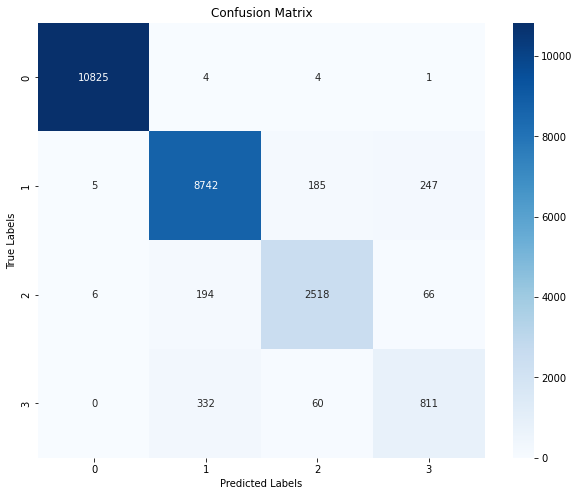

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
classes = ['0', '1' , '2', '3']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_predictions)



# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()